In [1]:
import pandas as pd

housing = pd.read_csv("housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [2]:
housing.columns
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [3]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


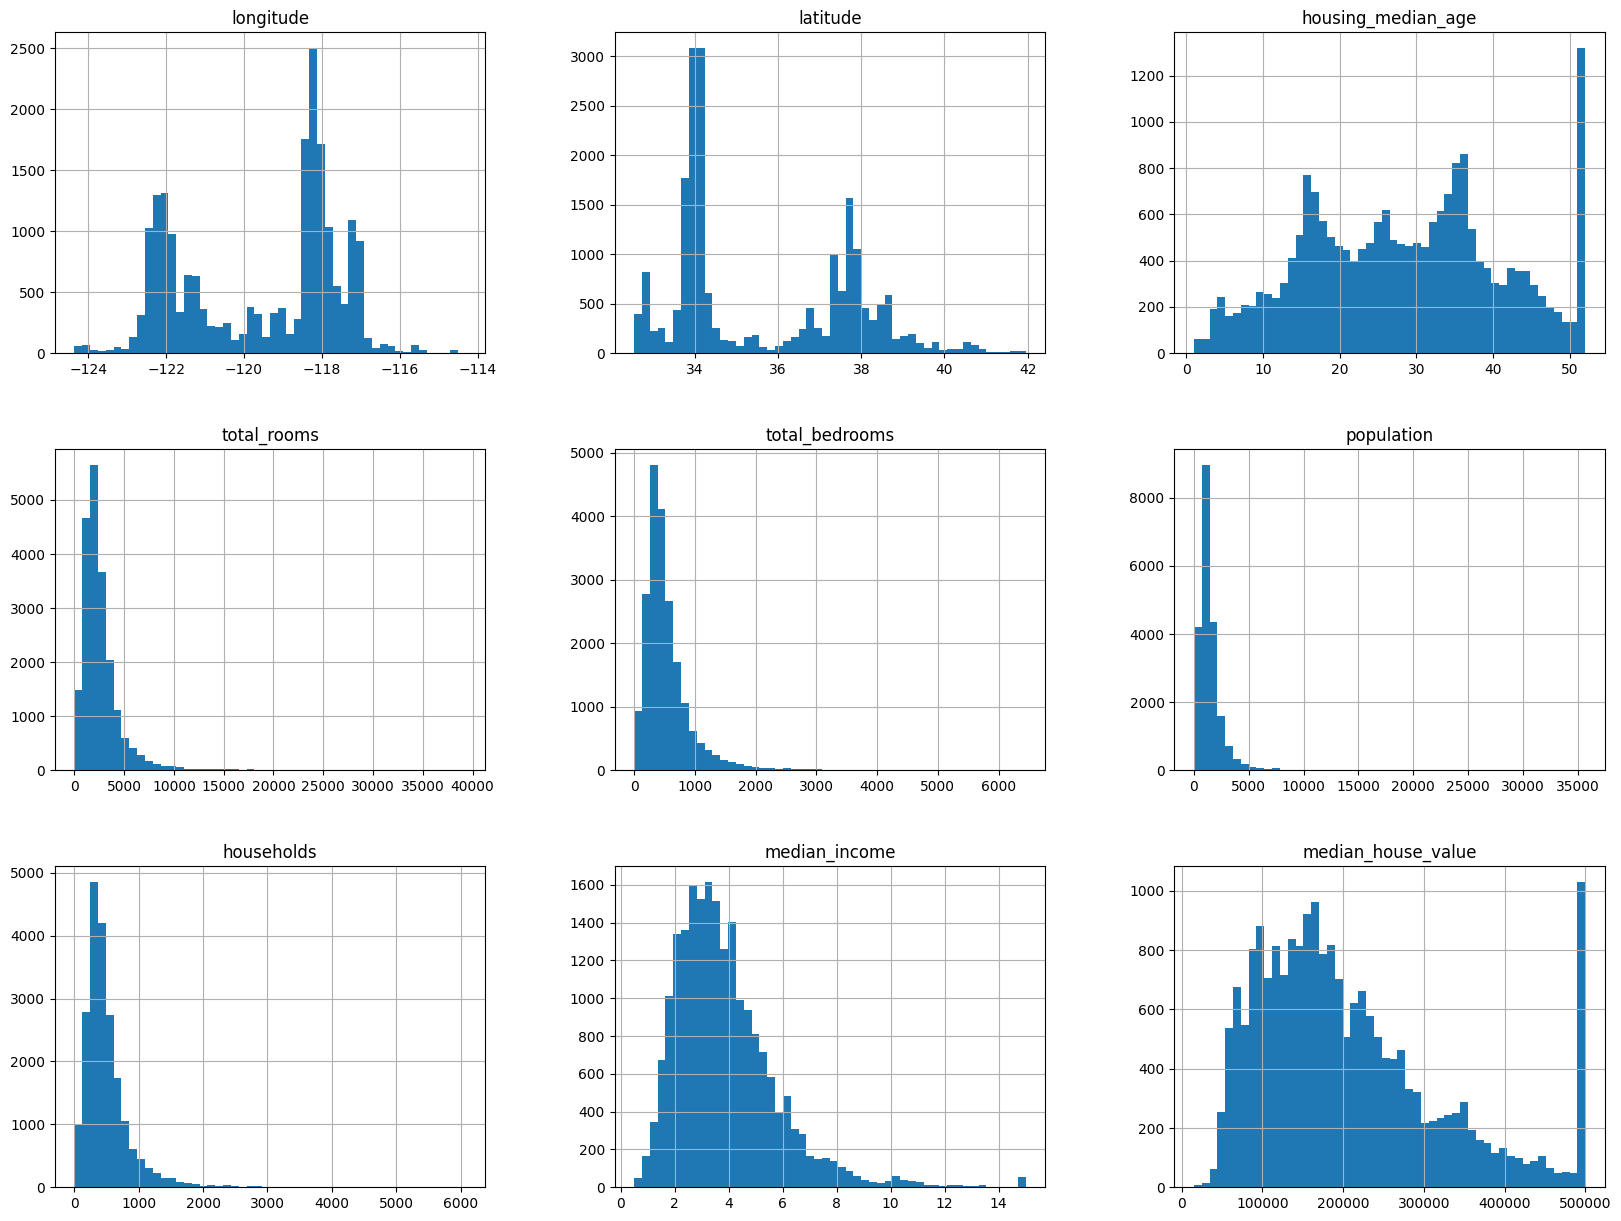

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [5]:
import numpy as np
np.random.seed(10)

In [6]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [7]:
train_set_1, test_set_1 = split_train_test(housing, 0.2)

In [8]:
print(train_set_1.shape)

(16512, 9)


In [9]:
print(test_set_1.shape)

(4128, 9)


Seed function selects the same set of random rows whenever the code is run.
The program will run without the seed function but has different test data and train data every time.

In [10]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=10)

In [11]:
# prompt: Compare the training/testing sets with the ones we had in cell 23. Do you get the same or different training or testing set?

print(train_set.head())
print(train_set_1.head())
print(test_set.head())
print(test_set_1.head())

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12346    -116.52     33.82                21.0      10227.0          2315.0   
19326    -122.94     38.50                46.0       2280.0           492.0   
16824    -122.49     37.63                31.0       3109.0           621.0   
6869     -118.11     34.06                16.0       2416.0           565.0   
16677    -120.66     35.13                41.0       2666.0           751.0   

       population  households  median_income  median_house_value  
12346      3623.0      1734.0         2.5212            145200.0  
19326       807.0       366.0         2.6316            117000.0  
16824      1472.0       618.0         5.1550            263900.0  
6869       1750.0       514.0         2.8229            163700.0  
16677       940.0       507.0         1.9653            236100.0  
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12346    -116.52     33.82                21

In [12]:
# Same seed number will result in same set of data

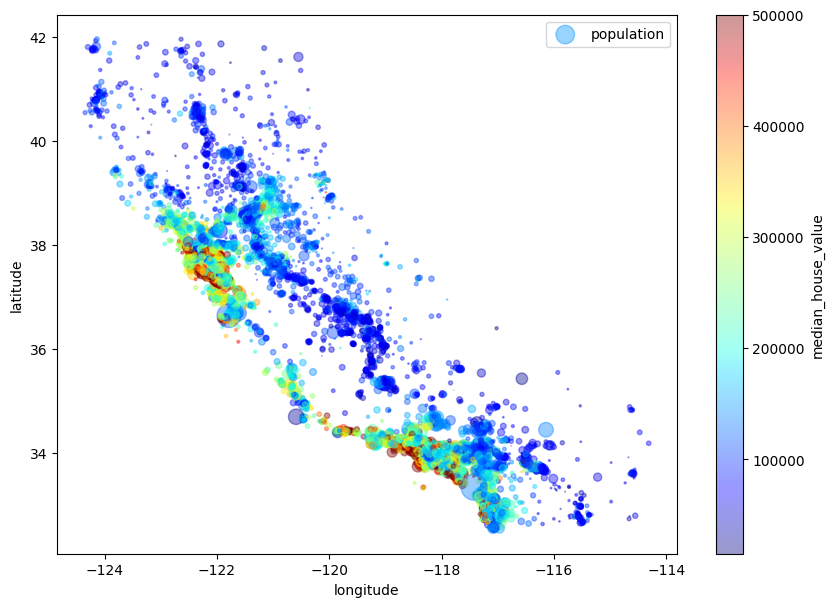

In [13]:
train_set.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=train_set["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

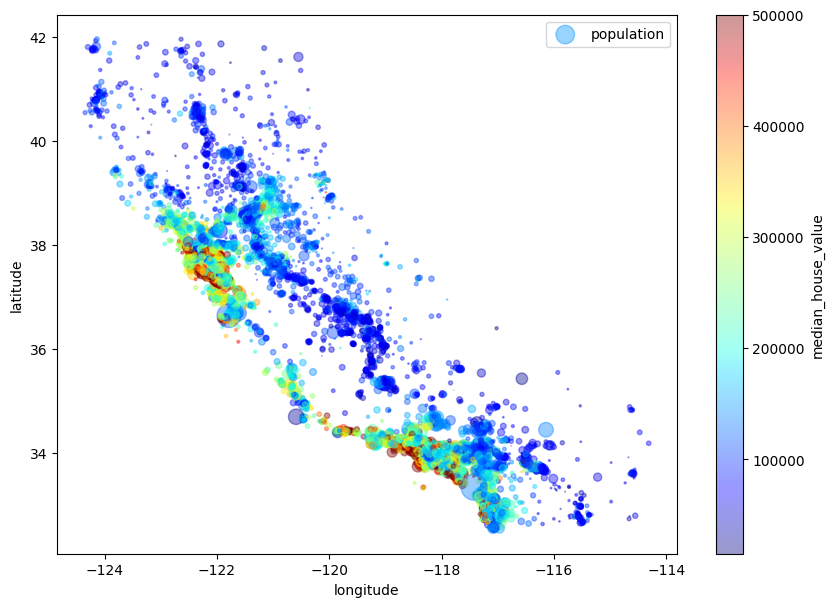

In [14]:
train_set.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=train_set["population"]/100, label="population", figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)

In [15]:
train_set[train_set.isna().any(axis =1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
6814,-118.07,34.10,32.0,4275.0,NaN,2812.0,1012.0,3.3512,214100.0
4738,-118.38,34.05,49.0,702.0,NaN,458.0,187.0,4.8958,333600.0
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0
19833,-119.38,36.53,38.0,1281.0,NaN,1423.0,293.0,1.9602,51400.0
4852,-118.31,34.03,47.0,1315.0,NaN,785.0,245.0,1.2300,138400.0
...,...,...,...,...,...,...,...,...,...
11512,-118.10,33.74,32.0,2035.0,NaN,934.0,512.0,4.2287,500001.0
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,95800.0
13015,-121.19,38.71,11.0,4415.0,NaN,1520.0,627.0,3.2321,390800.0
10236,-117.92,33.87,33.0,1597.0,NaN,1888.0,423.0,3.0550,157800.0


In [16]:
train_set_clean = train_set.dropna(subset=["total_bedrooms"])
train_set_clean

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
12346,-116.52,33.82,21.0,10227.0,2315.0,3623.0,1734.0,2.5212,145200.0
19326,-122.94,38.50,46.0,2280.0,492.0,807.0,366.0,2.6316,117000.0
16824,-122.49,37.63,31.0,3109.0,621.0,1472.0,618.0,5.1550,263900.0
6869,-118.11,34.06,16.0,2416.0,565.0,1750.0,514.0,2.8229,163700.0
16677,-120.66,35.13,41.0,2666.0,751.0,940.0,507.0,1.9653,236100.0
...,...,...,...,...,...,...,...,...,...
9372,-122.53,37.93,37.0,1722.0,352.0,648.0,337.0,4.1250,310300.0
7291,-118.22,33.98,18.0,1781.0,765.0,1913.0,702.0,1.2059,255000.0
17728,-121.79,37.32,6.0,2850.0,561.0,2160.0,581.0,5.5336,241900.0
7293,-118.23,33.98,35.0,1366.0,496.0,2160.0,497.0,2.2059,150000.0


In [17]:
train_labels = train_set_clean["median_house_value"].copy() # get labels for output label Y
train_features = train_set_clean.drop("median_house_value", axis=1) # drop labels to get features X for training set

In [18]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16346 entries, 12346 to 17673
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16346 non-null  float64
 1   latitude            16346 non-null  float64
 2   housing_median_age  16346 non-null  float64
 3   total_rooms         16346 non-null  float64
 4   total_bedrooms      16346 non-null  float64
 5   population          16346 non-null  float64
 6   households          16346 non-null  float64
 7   median_income       16346 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [19]:
train_features.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12346,-116.52,33.82,21.0,10227.0,2315.0,3623.0,1734.0,2.5212
19326,-122.94,38.50,46.0,2280.0,492.0,807.0,366.0,2.6316
16824,-122.49,37.63,31.0,3109.0,621.0,1472.0,618.0,5.1550
6869,-118.11,34.06,16.0,2416.0,565.0,1750.0,514.0,2.8229
16677,-120.66,35.13,41.0,2666.0,751.0,940.0,507.0,1.9653


In [20]:
train_features[ train_features.isna().any(axis = 1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income


In [21]:
train_labels

12346    145200.0
19326    117000.0
16824    263900.0
6869     163700.0
16677    236100.0
           ...   
9372     310300.0
7291     255000.0
17728    241900.0
7293     150000.0
17673    191100.0
Name: median_house_value, Length: 16346, dtype: float64

<Axes: >

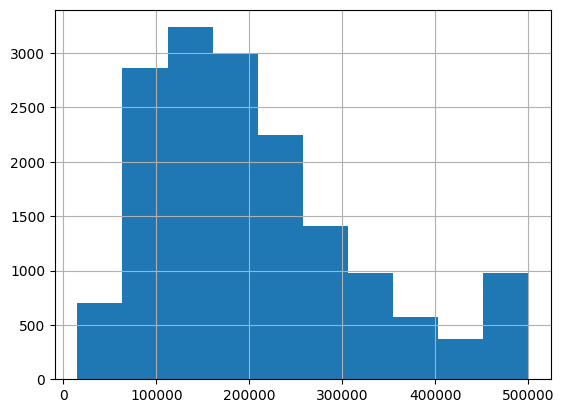

In [22]:
train_labels.hist()

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>, <Axes: >]],
      dtype=object)

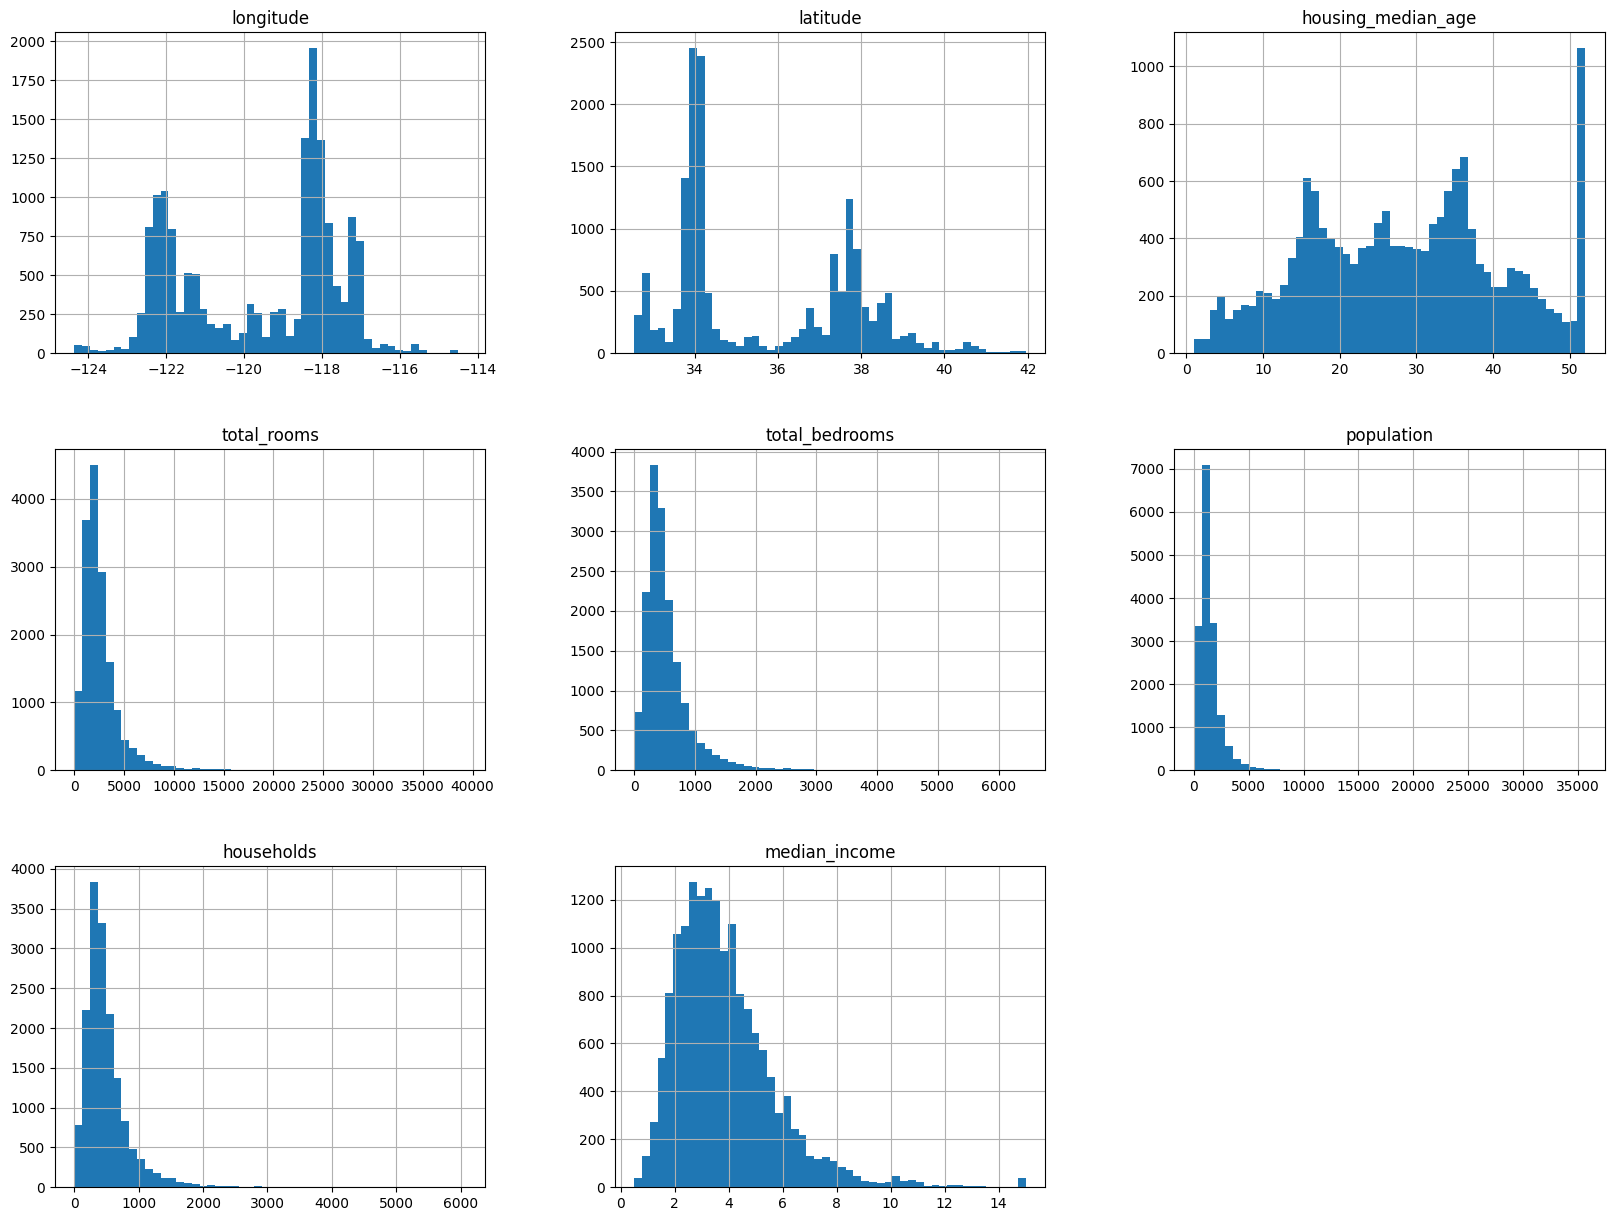

In [23]:
train_features.hist(bins=50, figsize=(20,15))

In [24]:
train_features.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000
mean,-119.576731,35.639888,28.606265,2630.196745,537.625413,1425.149456,498.992659,3.864135
std,2.006389,2.139648,12.632219,2158.731496,418.511077,1136.460782,378.999712,1.892231
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.800000,33.930000,18.000000,1451.000000,296.000000,785.000000,279.000000,2.559275
50%,-118.500000,34.260000,29.000000,2125.500000,435.000000,1165.500000,409.000000,3.533800
75%,-118.010000,37.720000,37.000000,3137.000000,647.000000,1728.000000,605.000000,4.739900
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100


In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() ## define the transformer
scaler.fit(train_features) ## call .fit() method to calculate the min and max value for each column in dataset

MinMaxScaler()

In [26]:
print("Min of each column: ",scaler.data_min_)
print("Max of each column: ",scaler.data_max_)

Min of each column:  [-124.35     32.54      1.        2.        1.        3.        1.
    0.4999]
Max of each column:  [-1.14310e+02  4.19500e+01  5.20000e+01  3.93200e+04  6.44500e+03
  3.56820e+04  6.08200e+03  1.50001e+01]


In [27]:
train_features_normalized = scaler.transform(train_features)
train_features_normalized

array([[0.77988048, 0.1360255 , 0.39215686, ..., 0.10146024, 0.28498602,
        0.13939808],
       [0.14043825, 0.63336876, 0.88235294, ..., 0.02253426, 0.06002302,
        0.14701177],
       [0.18525896, 0.54091392, 0.58823529, ..., 0.04117268, 0.10146358,
        0.32103695],
       ...,
       [0.25498008, 0.50797024, 0.09803922, ..., 0.06045573, 0.09537905,
        0.34714694],
       [0.60956175, 0.15302869, 0.66666667, ..., 0.06045573, 0.08156553,
        0.11765355],
       [0.24601594, 0.50584485, 0.29411765, ..., 0.04683427, 0.11182371,
        0.15009448]])

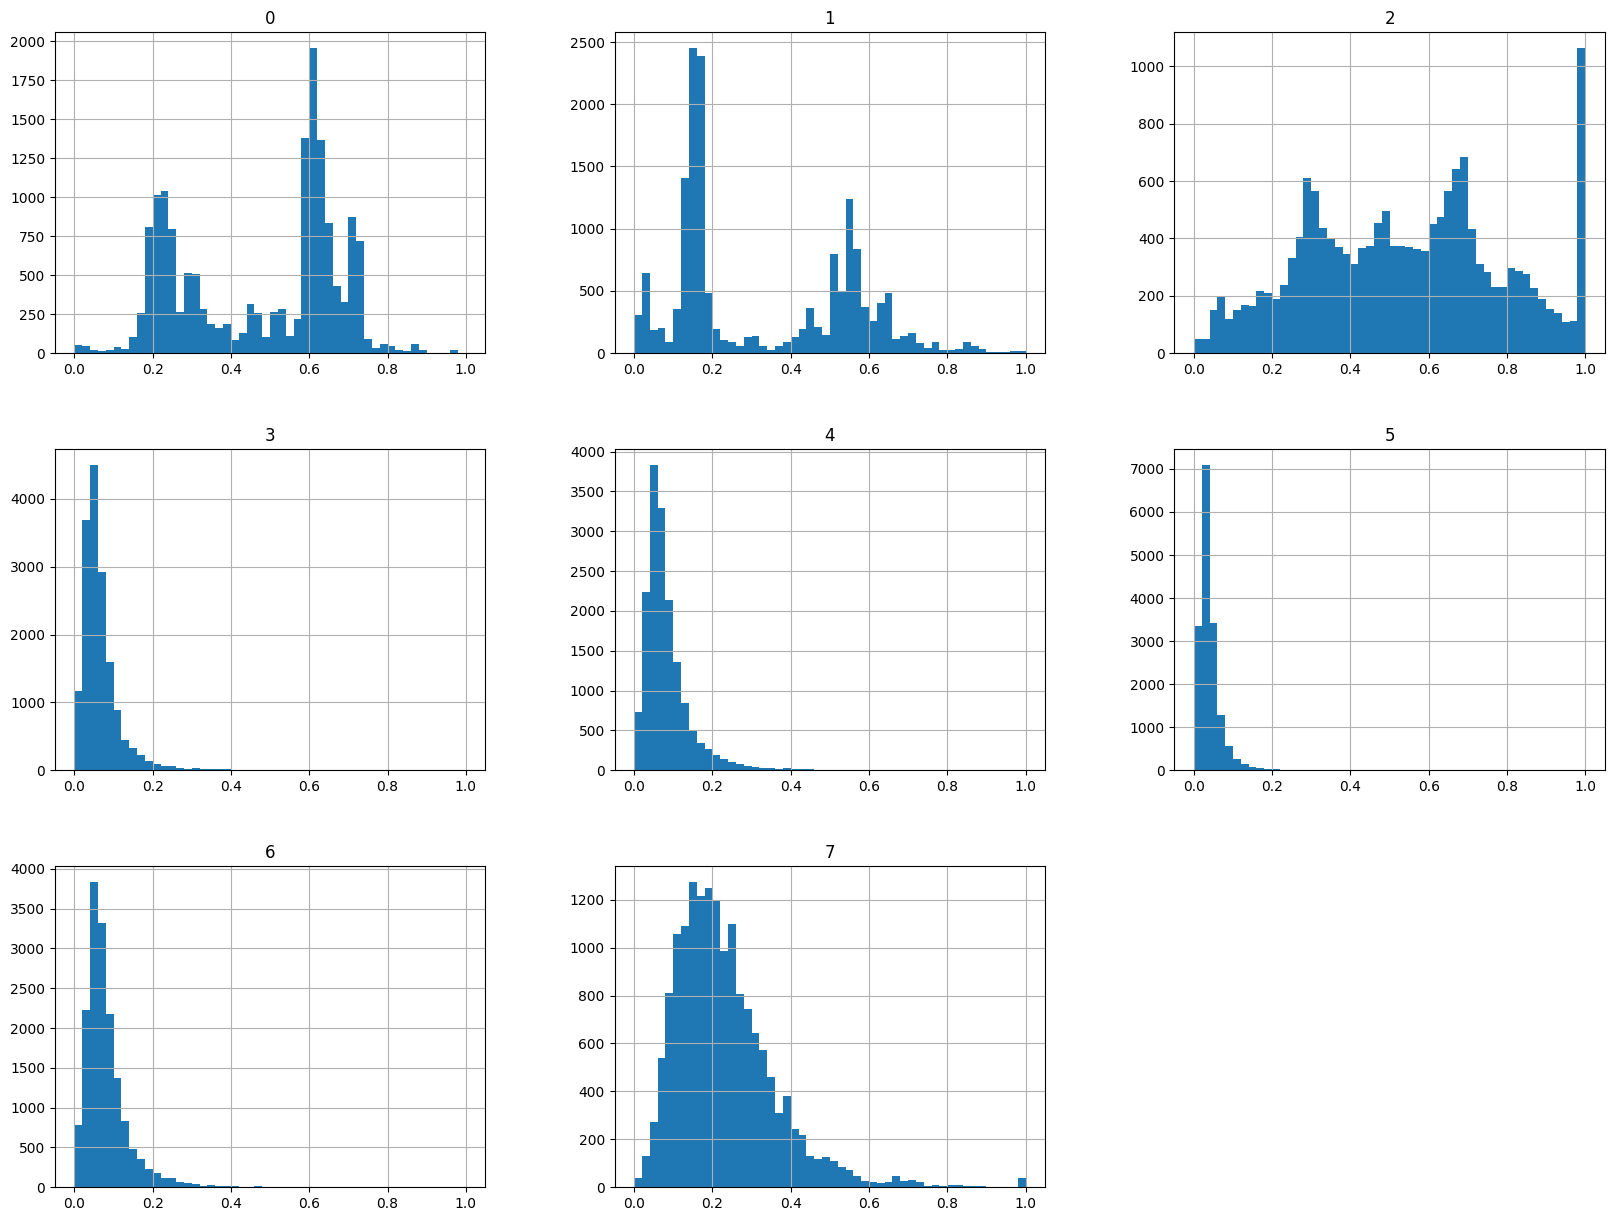

In [28]:
pd.DataFrame(train_features_normalized).hist(bins=50, figsize=(20,15))
plt.show()

Two techniques for transformation (when feature's distribution is having a heavy tail):

1. Replace the feature with its square root or logarithm
2. Bucketizing the feature: Roughly dividing the feature in equal sized buckets and replacing feature value with the bucket index.

Two techniques of feature scaling:

1. Min Max scaling: Each attribute is shifted and rescaled to be a value between 0 and 1. i.e. attribute - min / (max - min)
2. Standardization: attribute - mean / standard deviation

# Lab 03 Part B

## 10A

In [29]:
## 1. split data to get train and test set
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=10)

In [30]:
## 2. clean the missing values
train_set_clean = train_set.dropna(subset=["total_bedrooms"])
train_set_clean

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
12346,-116.52,33.82,21.0,10227.0,2315.0,3623.0,1734.0,2.5212,145200.0
19326,-122.94,38.50,46.0,2280.0,492.0,807.0,366.0,2.6316,117000.0
16824,-122.49,37.63,31.0,3109.0,621.0,1472.0,618.0,5.1550,263900.0
6869,-118.11,34.06,16.0,2416.0,565.0,1750.0,514.0,2.8229,163700.0
16677,-120.66,35.13,41.0,2666.0,751.0,940.0,507.0,1.9653,236100.0
...,...,...,...,...,...,...,...,...,...
9372,-122.53,37.93,37.0,1722.0,352.0,648.0,337.0,4.1250,310300.0
7291,-118.22,33.98,18.0,1781.0,765.0,1913.0,702.0,1.2059,255000.0
17728,-121.79,37.32,6.0,2850.0,561.0,2160.0,581.0,5.5336,241900.0
7293,-118.23,33.98,35.0,1366.0,496.0,2160.0,497.0,2.2059,150000.0


In [31]:
## 3. derive training features and training labels
train_labels = train_set_clean["median_house_value"].copy() # get labels for output label Y
train_features = train_set_clean.drop("median_house_value", axis=1) # drop labels to get features X for training set

In [32]:
## 4. scale the numeric features in training set
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() ## define the transformer
scaler.fit(train_features) ## call .fit() method to calculate the min and max value for each column in dataset

MinMaxScaler()

In [33]:
train_features_normalized = scaler.transform(train_features)
train_features_normalized

array([[0.77988048, 0.1360255 , 0.39215686, ..., 0.10146024, 0.28498602,
        0.13939808],
       [0.14043825, 0.63336876, 0.88235294, ..., 0.02253426, 0.06002302,
        0.14701177],
       [0.18525896, 0.54091392, 0.58823529, ..., 0.04117268, 0.10146358,
        0.32103695],
       ...,
       [0.25498008, 0.50797024, 0.09803922, ..., 0.06045573, 0.09537905,
        0.34714694],
       [0.60956175, 0.15302869, 0.66666667, ..., 0.06045573, 0.08156553,
        0.11765355],
       [0.24601594, 0.50584485, 0.29411765, ..., 0.04683427, 0.11182371,
        0.15009448]])

Task 1

In [34]:
## 2. clean the missing values
test_set_clean = test_set.dropna(subset=["total_bedrooms"])
test_set_clean

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
20303,-119.18,34.16,12.0,460.0,101.0,405.0,103.0,5.2783,167400.0
16966,-122.31,37.55,27.0,3931.0,933.0,1877.0,851.0,3.9722,354100.0
10623,-117.77,33.67,12.0,4329.0,1068.0,1913.0,978.0,4.5094,160200.0
6146,-117.95,34.11,29.0,1986.0,448.0,2013.0,432.0,3.1034,140800.0
2208,-119.87,36.81,6.0,1891.0,341.0,969.0,330.0,4.6726,107800.0
...,...,...,...,...,...,...,...,...,...
3263,-122.88,39.14,20.0,1125.0,231.0,521.0,196.0,2.2188,106300.0
11694,-117.98,33.89,18.0,2939.0,437.0,1278.0,435.0,7.1425,393700.0
1729,-122.34,37.98,33.0,2014.0,410.0,1354.0,427.0,3.9773,131300.0
5087,-118.28,33.98,45.0,1720.0,416.0,1382.0,365.0,0.9337,92300.0


In [35]:
## 3. derive training features and training labels
test_labels = test_set_clean["median_house_value"].copy() # get labels for output label Y
test_features = test_set_clean.drop("median_house_value", axis=1) # drop labels to get features X for training set
test_labels

20303    167400.0
16966    354100.0
10623    160200.0
6146     140800.0
2208     107800.0
           ...   
3263     106300.0
11694    393700.0
1729     131300.0
5087      92300.0
6581     500001.0
Name: median_house_value, Length: 4087, dtype: float64

In [36]:
test_features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
20303,-119.18,34.16,12.0,460.0,101.0,405.0,103.0,5.2783
16966,-122.31,37.55,27.0,3931.0,933.0,1877.0,851.0,3.9722
10623,-117.77,33.67,12.0,4329.0,1068.0,1913.0,978.0,4.5094
6146,-117.95,34.11,29.0,1986.0,448.0,2013.0,432.0,3.1034
2208,-119.87,36.81,6.0,1891.0,341.0,969.0,330.0,4.6726
...,...,...,...,...,...,...,...,...
3263,-122.88,39.14,20.0,1125.0,231.0,521.0,196.0,2.2188
11694,-117.98,33.89,18.0,2939.0,437.0,1278.0,435.0,7.1425
1729,-122.34,37.98,33.0,2014.0,410.0,1354.0,427.0,3.9773
5087,-118.28,33.98,45.0,1720.0,416.0,1382.0,365.0,0.9337


In [37]:
## 4. scale the numeric features in training set
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() ## define the transformer
scaler.fit(test_features) ## call .fit() method to calculate the min and max value for each column in dataset

MinMaxScaler()

In [38]:
test_features_normalized = scaler.transform(test_features)
test_features_normalized

array([[0.52191641, 0.17241379, 0.21568627, ..., 0.02481851, 0.01928268,
        0.32954028],
       [0.20285423, 0.53771552, 0.50980392, ..., 0.11615065, 0.16351716,
        0.23946566],
       [0.6656473 , 0.11961207, 0.21568627, ..., 0.11838431, 0.18800617,
        0.27651343],
       ...,
       [0.19979613, 0.58405172, 0.62745098, ..., 0.08370044, 0.08175858,
        0.23981738],
       [0.61365953, 0.15301724, 0.8627451 , ..., 0.08543774, 0.06980332,
        0.02991683],
       [0.62181448, 0.17780172, 0.76470588, ..., 0.03747596, 0.04261473,
        0.5060344 ]])

# 10B

Task

In [39]:
# practice 10b.1: import KNN Regressor from sklearn
from sklearn.neighbors import KNeighborsRegressor

# practice 10b.2: Train a KNN Regressor model
import time
start_time = time.time()

KNN_Regressor = KNeighborsRegressor(n_neighbors=10, metric = 'euclidean')
KNN_Regressor.fit(train_features_normalized, train_labels) # make sure to use normalized features from Step 10a

# Record the ending time
end_time = time.time()
elapsed_time = end_time - start_time
print("Running time:", elapsed_time, "seconds")

Running time: 0.047289133071899414 seconds


# 10C

In [40]:
training_predictions = KNN_Regressor.predict(train_features_normalized)   # make sure to use normalized training features as used in Step 10b
training_predictions

array([117520. , 179180. , 349970.1, ..., 254950. , 150750. , 187270. ])

Task

In [41]:
print(training_predictions.shape)

(16346,)


In [42]:
print(train_labels.shape)

(16346,)


# 10D

In [43]:
import pandas as pd
prediction_summary = pd.DataFrame({'predicted_label':training_predictions, 'actual_label':train_labels})
prediction_summary

,predicted_label,actual_label
12346,117520.0,145200.0
19326,179180.0,117000.0
16824,349970.1,263900.0
6869,161640.0,163700.0
16677,167120.0,236100.0
...,...,...
9372,263180.0,310300.0
7291,176630.0,255000.0
17728,254950.0,241900.0
7293,150750.0,150000.0


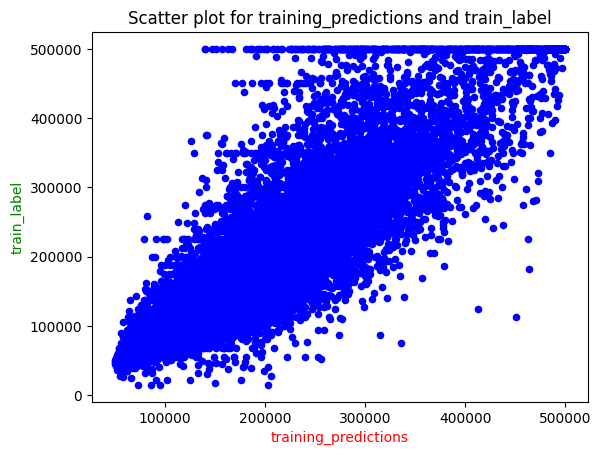

In [44]:
## plot scatter plot using pandas
import matplotlib.pyplot as plt
prediction_summary.plot.scatter(x='predicted_label', y='actual_label', color='blue', marker='o')
plt.xlabel('training_predictions', color = 'red')
plt.ylabel('train_label', color = 'green')
plt.title('Scatter plot for training_predictions and train_label')
plt.show()

# The expected output figure is shown below:

Task 1:

The predictions are in a increasing pattern like the labels. So, we can say that they are not random. Though the results are not perfect, they are atleast following some pattern.

Task 2:

In [45]:
import numpy as np
np.corrcoef(training_predictions, train_labels)

array([[1.        , 0.87566661],
       [0.87566661, 1.        ]])

# 10E

In [46]:
prediction_summary['error'] = prediction_summary['actual_label'] - prediction_summary['predicted_label']
prediction_summary

,predicted_label,actual_label,error
12346,117520.0,145200.0,27680.0
19326,179180.0,117000.0,-62180.0
16824,349970.1,263900.0,-86070.1
6869,161640.0,163700.0,2060.0
16677,167120.0,236100.0,68980.0
...,...,...,...
9372,263180.0,310300.0,47120.0
7291,176630.0,255000.0,78370.0
17728,254950.0,241900.0,-13050.0
7293,150750.0,150000.0,-750.0


In [47]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(train_labels, training_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

55743.33849539552

Task 1:

RMSE = 54692.046232990266

Task 2:

I am not satisfied with the model performance as the RMSE value depicts. The higher the value, the larger the error is with the predictions of the model. The model is underfitting.

Task 3:

MAE (Mean Absolute error) is sometimes used in place of RMSE as an evaluation method because RMSE magnifies the effect of larger errors whereas the MAE doesn't.

# 10F

Task 1:

Cross validation divides the dataset into k random equal subsets. This is referred as k-fold cross validation. The sets are divided, for example, 10-fold CV, 9 training  folds and 1 validation fold. The model makes predictions in 9 folds and validates with 1 remaining fold.

In [48]:
# practice 10f.1: Define one KNN model
from sklearn.neighbors import KNeighborsRegressor
KNN_regressor = KNeighborsRegressor(n_neighbors=10, metric = 'euclidean') # pick one configuration K=7

In [49]:
## practice 10f.2:  Evaluate the KNN model using cross-validation on the training set
# KNN will take ~3min set using 10-fold cross-validation
from sklearn.model_selection import cross_val_score
CV_mse_scores = cross_val_score(estimator = KNN_regressor, X = train_features_normalized, y = train_labels, cv = 10, scoring = 'neg_mean_squared_error')
print("CV_mse_scores: ", CV_mse_scores)

CV_mse_scores:  [-3.89551523e+09 -4.00234641e+09 -3.61041745e+09 -3.86795072e+09
 -4.10870126e+09 -3.84635763e+09 -4.06023002e+09 -3.81311171e+09
 -3.74241921e+09 -4.11327815e+09]


Task 2:

There are 10 CV scores, they are formed by using the negative mean squared error technique. This is followed in the 9 folds and validated with the remaining fold and hence we got 10 values for 10-fold CV.

Task 3:

In [50]:
# display CV scores
def display_scores(scores):
    print("CV_scores: ", scores)
    print("CV Mean: ", scores.mean())
    print("CV Standard deviation: ", scores.std())

In [51]:
display_scores(CV_mse_scores)

CV_scores:  [-3.89551523e+09 -4.00234641e+09 -3.61041745e+09 -3.86795072e+09
 -4.10870126e+09 -3.84635763e+09 -4.06023002e+09 -3.81311171e+09
 -3.74241921e+09 -4.11327815e+09]
CV Mean:  -3906032778.7525263
CV Standard deviation:  156522329.16303658


Task 4:

In [52]:
CV_r2_scores = cross_val_score(estimator = KNN_regressor, X = train_features_normalized, y = train_labels, cv = 10, scoring = 'r2')
print("CV_r2_scores: ", CV_r2_scores)

CV_r2_scores:  [0.69261526 0.71321451 0.71636448 0.69529889 0.69528495 0.71670111
 0.69599248 0.71264804 0.71939542 0.68961128]


We got the positive scores for the r2 when compared to the negative mse scores and the values are less than 1.

# 11

Task 1:

Getting values for the table

In [53]:
#@title K=1

from sklearn.neighbors import KNeighborsRegressor
KNN_Regressor = KNeighborsRegressor(n_neighbors=1, metric = 'euclidean')
KNN_Regressor.fit(train_features_normalized, train_labels)

training_predictions = KNN_Regressor.predict(train_features_normalized)

from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(train_labels, training_predictions)
lin_rmse = np.sqrt(lin_mse)
print('Training MSE',lin_rmse)

print('Correlation')
import numpy as np
print(np.corrcoef(training_predictions, train_labels))

from sklearn.neighbors import KNeighborsRegressor
KNN_regressor = KNeighborsRegressor(n_neighbors=1, metric = 'euclidean')

from sklearn.model_selection import cross_val_score
CV_mse_scores = cross_val_score(estimator = KNN_regressor, X = train_features_normalized, y = train_labels, cv = 10, scoring = 'neg_mean_squared_error')

def display_scores(scores):
    print("CV Mean: ", scores.mean())
    print("CV Standard deviation: ", scores.std())

print('10 fold CV MSE')
display_scores(CV_mse_scores)

CV_r2_scores = cross_val_score(estimator = KNN_regressor, X = train_features_normalized, y = train_labels, cv = 10, scoring = 'r2')
print('10 fold R2')
display_scores(CV_r2_scores)

Training MSE 0.0
Correlation
[[1. 1.]
 [1. 1.]]
10 fold CV MSE
CV Mean:  -5785627901.948748
CV Standard deviation:  282548939.1125237
10 fold R2
CV Mean:  0.5624361151148096
CV Standard deviation:  0.023990966744613144


In [54]:
#@title K=3

from sklearn.neighbors import KNeighborsRegressor
KNN_Regressor = KNeighborsRegressor(n_neighbors=3, metric = 'euclidean')
KNN_Regressor.fit(train_features_normalized, train_labels)

training_predictions = KNN_Regressor.predict(train_features_normalized)

from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(train_labels, training_predictions)
lin_rmse = np.sqrt(lin_mse)
print('Training MSE',lin_rmse)

print('Correlation')
import numpy as np
print(np.corrcoef(training_predictions, train_labels))

from sklearn.neighbors import KNeighborsRegressor
KNN_regressor = KNeighborsRegressor(n_neighbors=3, metric = 'euclidean')

from sklearn.model_selection import cross_val_score
CV_mse_scores = cross_val_score(estimator = KNN_regressor, X = train_features_normalized, y = train_labels, cv = 10, scoring = 'neg_mean_squared_error')

def display_scores(scores):
    print("CV Mean: ", scores.mean())
    print("CV Standard deviation: ", scores.std())

print('10 fold CV MSE')
display_scores(CV_mse_scores)

CV_r2_scores = cross_val_score(estimator = KNN_regressor, X = train_features_normalized, y = train_labels, cv = 10, scoring = 'r2')
print('10 fold R2')
display_scores(CV_r2_scores)

Training MSE 44921.72441672835
Correlation
[[1.         0.92096524]
 [0.92096524 1.        ]]
10 fold CV MSE
CV Mean:  -4248065390.28994
CV Standard deviation:  178940010.04488206
10 fold R2
CV Mean:  0.6788394069479919
CV Standard deviation:  0.013231006459082454


In [55]:
#@title K=5

from sklearn.neighbors import KNeighborsRegressor
KNN_Regressor = KNeighborsRegressor(n_neighbors=5, metric = 'euclidean')
KNN_Regressor.fit(train_features_normalized, train_labels)

training_predictions = KNN_Regressor.predict(train_features_normalized)

from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(train_labels, training_predictions)
lin_rmse = np.sqrt(lin_mse)
print('Training MSE',lin_rmse)

print('Correlation')
import numpy as np
print(np.corrcoef(training_predictions, train_labels))

from sklearn.neighbors import KNeighborsRegressor
KNN_regressor = KNeighborsRegressor(n_neighbors=5, metric = 'euclidean')

from sklearn.model_selection import cross_val_score
CV_mse_scores = cross_val_score(estimator = KNN_regressor, X = train_features_normalized, y = train_labels, cv = 10, scoring = 'neg_mean_squared_error')

def display_scores(scores):
    print("CV Mean: ", scores.mean())
    print("CV Standard deviation: ", scores.std())

print('10 fold CV MSE')
display_scores(CV_mse_scores)

CV_r2_scores = cross_val_score(estimator = KNN_regressor, X = train_features_normalized, y = train_labels, cv = 10, scoring = 'r2')
print('10 fold R2')
display_scores(CV_r2_scores)

Training MSE 50586.62105352373
Correlation
[[1.         0.89873576]
 [0.89873576 1.        ]]
10 fold CV MSE
CV Mean:  -4013254639.1068344
CV Standard deviation:  213214769.35240448
10 fold R2
CV Mean:  0.6966243099537704
CV Standard deviation:  0.015209203198258933


In [56]:
#@title K=7

from sklearn.neighbors import KNeighborsRegressor
KNN_Regressor = KNeighborsRegressor(n_neighbors=7, metric = 'euclidean')
KNN_Regressor.fit(train_features_normalized, train_labels)

training_predictions = KNN_Regressor.predict(train_features_normalized)

from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(train_labels, training_predictions)
lin_rmse = np.sqrt(lin_mse)
print('Training MSE',lin_rmse)

print('Correlation')
import numpy as np
print(np.corrcoef(training_predictions, train_labels))

from sklearn.neighbors import KNeighborsRegressor
KNN_regressor = KNeighborsRegressor(n_neighbors=7, metric = 'euclidean')

from sklearn.model_selection import cross_val_score
CV_mse_scores = cross_val_score(estimator = KNN_regressor, X = train_features_normalized, y = train_labels, cv = 10, scoring = 'neg_mean_squared_error')

def display_scores(scores):
    print("CV Mean: ", scores.mean())
    print("CV Standard deviation: ", scores.std())

print('10 fold CV MSE')
display_scores(CV_mse_scores)

CV_r2_scores = cross_val_score(estimator = KNN_regressor, X = train_features_normalized, y = train_labels, cv = 10, scoring = 'r2')
print('10 fold R2')
display_scores(CV_r2_scores)

Training MSE 53449.55657533636
Correlation
[[1.         0.88627989]
 [0.88627989 1.        ]]
10 fold CV MSE
CV Mean:  -3912966215.784583
CV Standard deviation:  182773010.66517955
10 fold R2
CV Mean:  0.7042406815238087
CV Standard deviation:  0.01206717541654081


In [57]:
#@title K=9

from sklearn.neighbors import KNeighborsRegressor
KNN_Regressor = KNeighborsRegressor(n_neighbors=9, metric = 'euclidean')
KNN_Regressor.fit(train_features_normalized, train_labels)

training_predictions = KNN_Regressor.predict(train_features_normalized)

from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(train_labels, training_predictions)
lin_rmse = np.sqrt(lin_mse)
print('Training MSE',lin_rmse)

print('Correlation')
import numpy as np
print(np.corrcoef(training_predictions, train_labels))

from sklearn.neighbors import KNeighborsRegressor
KNN_regressor = KNeighborsRegressor(n_neighbors=9, metric = 'euclidean')

from sklearn.model_selection import cross_val_score
CV_mse_scores = cross_val_score(estimator = KNN_regressor, X = train_features_normalized, y = train_labels, cv = 10, scoring = 'neg_mean_squared_error')

def display_scores(scores):
    print("CV Mean: ", scores.mean())
    print("CV Standard deviation: ", scores.std())

print('10 fold CV MSE')
display_scores(CV_mse_scores)

CV_r2_scores = cross_val_score(estimator = KNN_regressor, X = train_features_normalized, y = train_labels, cv = 10, scoring = 'r2')
print('10 fold R2')
display_scores(CV_r2_scores)

Training MSE 55026.97527737112
Correlation
[[1.         0.87904276]
 [0.87904276 1.        ]]
10 fold CV MSE
CV Mean:  -3905838373.851795
CV Standard deviation:  161410326.02991804
10 fold R2
CV Mean:  0.704745584020091
CV Standard deviation:  0.011111162825618297


Task 2:

MSE is continuously increasing as the K value is increasing
CV MSE 10 fold values are also increasing

For K=1, the values are overfitting

# 12

In [58]:
## Step 1: training the model using KNN algorithm
from sklearn.neighbors import KNeighborsRegressor
KNN_regressor_k1 = KNeighborsRegressor(n_neighbors=1) # pick one configuration K=1
KNN_regressor_k1.fit(train_features_normalized, train_labels)

KNeighborsRegressor(n_neighbors=1)

In [59]:
### Step 2: make a prediction using KNN model on the training data
training_predictions_knn_k1 = KNN_regressor_k1.predict(train_features_normalized)
training_predictions_knn_k1

array([145200., 117000., 263900., ..., 241900., 150000., 191100.])

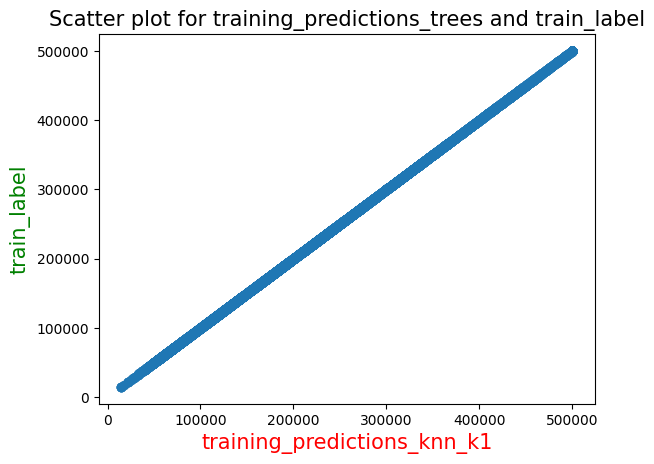

In [60]:
## Step 3: visualize the scatter plot between predictions and actual labels of training data
import matplotlib.pyplot as plt
plt.scatter(training_predictions_knn_k1, train_labels )
plt.xlabel('training_predictions_knn_k1', fontsize=15, color="red")
plt.ylabel('train_label', fontsize=15,color="green")
plt.title('Scatter plot for training_predictions_trees and train_label', fontsize=15)
plt.show()

In [61]:
from sklearn.metrics import mean_squared_error
knn_k1_mse = mean_squared_error(train_labels, training_predictions_knn_k1)
print("Training MSE of model: ",knn_k1_mse)

Training MSE of model:  0.0


Task 1:

For k=1, the predictions are completely overfitting.

# 13

Task 1:

Parameter tuning works by systematically testing different combinations of hyperparameters and evaluating each combination's performance using a chosen metric, such as accuracy, mean squared error, or F1 score. The goal is to find the set of hyperparameters that optimizes the model's performance on unseen data, typically measured using cross-validation to prevent overfitting.

The two commonly used methods are
1. GridSearch
2. Random Search

# 13B

In [62]:
# Practice 13.1: define a ML model to finetune the hyper-parameters
from sklearn.neighbors import KNeighborsRegressor
KNN_regressor = KNeighborsRegressor()
# leave the hyper-parameters empty inside the method classs

In [63]:
# parameter 1: n_neighbors
n_neighbors_list = [1, 3, 5, 7, 9]
# parameter 2: weighting strategies
metrics_list = ["uniform", "distance"]

In [64]:
# Practice 13.2: Define the hyper-parameter combination
KNN_param_grid = {
'n_neighbors': n_neighbors_list,
'weights': metrics_list
}

In [65]:
# Practice 13.3: define grid_search
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = KNN_regressor, param_grid = KNN_param_grid, cv = 10, scoring = 'r2', return_train_score = True)
## we use 'r2' as evaluation metrics for this example
## check what does return_train_score = True mean

In [66]:
# Practice 13.4: fit grid-searchcv on training data
grid_search.fit(X = train_features_normalized, y = train_labels)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='r2')

# 13C

In [67]:
# practice 13c.1: get best parameters
grid_search.best_params_

{'n_neighbors': 9, 'weights': 'distance'}

In [68]:
# practice 13c.2: get best estimator
best_knn_model = grid_search.best_estimator_
best_knn_model

KNeighborsRegressor(n_neighbors=9, weights='distance')

In [69]:
#@title Task 1
# Create a df from the cv_resutls
df_cv = pd.DataFrame(grid_search.cv_results_)
df_cv.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.016653,0.002182,0.022847,0.001142,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",0.519702,0.603715,0.573019,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.016398,0.001529,0.022743,0.001309,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",0.519702,0.603715,0.573019,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.018425,0.004892,0.034303,0.006452,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.665652,0.689578,0.684602,...,0.845155,0.845877,0.847110,0.845713,0.845675,0.843759,0.845161,0.846836,0.845660,0.001091
3,0.019030,0.005486,0.035886,0.009388,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.669229,0.697347,0.692106,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.015467,0.000092,0.039379,0.004536,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.684007,0.699685,0.705688,...,0.803992,0.804432,0.805589,0.804018,0.805180,0.802353,0.802877,0.806684,0.804357,0.001389


Task 2:

fit time column: time taken to train the model

score columns: time taken to predict

params: String of hyper-parameters of each column

param_weights: weights of different combinations used in K-nearest neighbours

test_score, train_score: Performance score model test and train data


# 14

In [70]:
## 1. clean the missing values in test set
test_set_clean = test_set.dropna(subset=["total_bedrooms"])
test_set_clean

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
20303,-119.18,34.16,12.0,460.0,101.0,405.0,103.0,5.2783,167400.0
16966,-122.31,37.55,27.0,3931.0,933.0,1877.0,851.0,3.9722,354100.0
10623,-117.77,33.67,12.0,4329.0,1068.0,1913.0,978.0,4.5094,160200.0
6146,-117.95,34.11,29.0,1986.0,448.0,2013.0,432.0,3.1034,140800.0
2208,-119.87,36.81,6.0,1891.0,341.0,969.0,330.0,4.6726,107800.0
...,...,...,...,...,...,...,...,...,...
3263,-122.88,39.14,20.0,1125.0,231.0,521.0,196.0,2.2188,106300.0
11694,-117.98,33.89,18.0,2939.0,437.0,1278.0,435.0,7.1425,393700.0
1729,-122.34,37.98,33.0,2014.0,410.0,1354.0,427.0,3.9773,131300.0
5087,-118.28,33.98,45.0,1720.0,416.0,1382.0,365.0,0.9337,92300.0


In [71]:
## 2. derive test features and test labels. In this case, test labels are only used for evaluation
test_labels = test_set_clean["median_house_value"].copy() # get labels for output label Y
test_features = test_set_clean.drop("median_house_value", axis=1) # drop labels to get features X for training set


## 4. scale the numeric features in test set. The scaler is derived from Step 10
## important note: do not apply fit function on the test set, using same scalar from training set
test_features_normalized = scaler.transform(test_features)
test_features_normalized

array([[0.52191641, 0.17241379, 0.21568627, ..., 0.02481851, 0.01928268,
        0.32954028],
       [0.20285423, 0.53771552, 0.50980392, ..., 0.11615065, 0.16351716,
        0.23946566],
       [0.6656473 , 0.11961207, 0.21568627, ..., 0.11838431, 0.18800617,
        0.27651343],
       ...,
       [0.19979613, 0.58405172, 0.62745098, ..., 0.08370044, 0.08175858,
        0.23981738],
       [0.61365953, 0.15301724, 0.8627451 , ..., 0.08543774, 0.06980332,
        0.02991683],
       [0.62181448, 0.17780172, 0.76470588, ..., 0.03747596, 0.04261473,
        0.5060344 ]])

In [72]:
### Step 5: make a prediction using the best model from the hyper-parameter tuning
# practice 13c.2: get best estimator
best_knn_model = grid_search.best_estimator_
test_predictions_knn = best_knn_model.predict(test_features_normalized)
test_predictions_knn

array([322741.00801447, 250409.67942524, 191558.03474468, ...,
       260163.42618696, 129864.63337078, 467212.33086968])

In [73]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
test_knn_mse = mean_squared_error(test_labels, test_predictions_knn)
test_knn_correlation = np.corrcoef(test_labels, test_predictions_knn)
test_knn_R2 = r2_score(test_labels, test_predictions_knn)
print("MSE: ", test_knn_mse)
print("Correlation: ", test_knn_correlation)
print("R2-score: ", test_knn_R2)

MSE:  4364782631.990618
Correlation:  [[1.         0.83272273]
 [0.83272273 1.        ]]
R2-score:  0.6803241320815888


# 15

In [99]:
test_features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
20303,-119.18,34.16,12.0,460.0,101.0,405.0,103.0,5.2783
16966,-122.31,37.55,27.0,3931.0,933.0,1877.0,851.0,3.9722
10623,-117.77,33.67,12.0,4329.0,1068.0,1913.0,978.0,4.5094
6146,-117.95,34.11,29.0,1986.0,448.0,2013.0,432.0,3.1034
2208,-119.87,36.81,6.0,1891.0,341.0,969.0,330.0,4.6726
...,...,...,...,...,...,...,...,...
3263,-122.88,39.14,20.0,1125.0,231.0,521.0,196.0,2.2188
11694,-117.98,33.89,18.0,2939.0,437.0,1278.0,435.0,7.1425
1729,-122.34,37.98,33.0,2014.0,410.0,1354.0,427.0,3.9773
5087,-118.28,33.98,45.0,1720.0,416.0,1382.0,365.0,0.9337


In [105]:
# prompt: create pandas dataframe with sample row values as numpy array structure with only 1 row with appropriate column names

test_features_sample = pd.DataFrame(np.array([[18.0, 2.3095, 0, 0, 1, 35, 1, 936, 0.8936, 1, 21]]), columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity', 'rooms_per_household', 'bedrooms_per_room'])
test_features_sample


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room
0,18.0,2.3095,0.0,0.0,1.0,35.0,1.0,936.0,0.8936,1.0,21.0


In [89]:
test_features_normalized

array([[0.52191641, 0.17241379, 0.21568627, ..., 0.02481851, 0.01928268,
        0.32954028],
       [0.20285423, 0.53771552, 0.50980392, ..., 0.11615065, 0.16351716,
        0.23946566],
       [0.6656473 , 0.11961207, 0.21568627, ..., 0.11838431, 0.18800617,
        0.27651343],
       ...,
       [0.19979613, 0.58405172, 0.62745098, ..., 0.08370044, 0.08175858,
        0.23981738],
       [0.61365953, 0.15301724, 0.8627451 , ..., 0.08543774, 0.06980332,
        0.02991683],
       [0.62181448, 0.17780172, 0.76470588, ..., 0.03747596, 0.04261473,
        0.5060344 ]])

In [74]:
# Practice 15.1 Save the scaler to disk file

from joblib import dump, load

dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [75]:
ls

housing.csv  sample_data/  scaler.joblib


In [76]:
# Practice 15.2 Save the scaler to disk file

from joblib import dump, load

dump(best_knn_model, 'best_knn_model.joblib')

['best_knn_model.joblib']

In [77]:
# Practice 15.3 reload the scaler from disk file

from joblib import dump, load

scaler_reload = load('scaler.joblib')


print("Scaler Min: ",scaler_reload.data_min_)

print("Scaler Max: ",scaler_reload.data_max_)

Scaler Min:  [-124.3      32.56      1.       16.        3.        5.        3.
    0.4999]
Scaler Max:  [-1.14490e+02  4.18400e+01  5.20000e+01  3.79370e+04  5.47100e+03
  1.61220e+04  5.18900e+03  1.50001e+01]


In [78]:
scaler_reload

MinMaxScaler()

In [79]:
# Practice 15.4 Save the KNN model from disk file

from joblib import dump, load

KNN_model_reload = load('best_knn_model.joblib')

KNN_model_reload

KNeighborsRegressor(n_neighbors=9, weights='distance')

In [88]:
KNN_model_reload.predict(test_features_normalized)

array([322741.00801447, 250409.67942524, 191558.03474468, ...,
       260163.42618696, 129864.63337078, 467212.33086968])